<a href="https://colab.research.google.com/github/rohithdonthi/Projects/blob/main/Geospacial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem Statement: ***
A geographical analysis to see the number of outlets in Bangalore, famous cuisines and dishes, ratings and price of restaurants having online orders and no online orders.


In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
#Reading data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3-Zomato Data Analysis/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.shape

(51717, 17)

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [12]:
for feature in feature_na:
  print(' {} has {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

 rate has 15.0337 missing values
 phone has 2.3358 missing values
 location has 0.0406 missing values
 rest_type has 0.4389 missing values
 dish_liked has 54.2916 missing values
 cuisines has 0.087 missing values
 approx_cost(for two people) has 0.669 missing values


In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [15]:
df.shape

(43942, 17)

In [16]:
def split(x):
  return x.split('/')[0]

In [17]:
df['rate'] = df['rate'].apply(split)

In [18]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [19]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [20]:
df.replace('NEW',0,inplace=True)

In [21]:
df.replace('-',0,inplace=True)

In [22]:
df['rate'].dtype

dtype('O')

In [23]:
df['rate']=df['rate'].astype(float)

In [24]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [33]:
#Finding the avg.ratings of restaurants 

In [31]:
df_rate= df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['restaurant','avg_rating']
df_rate.head()

,restaurant,avg_rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


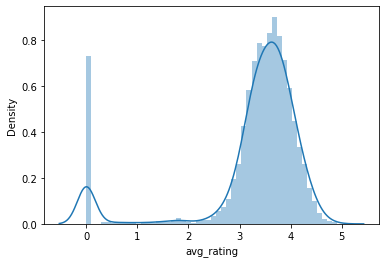

In [35]:
sns.distplot(df_rate['avg_rating']) #Distribution of rating column

Text(0, 0.5, 'Name of restaurants')

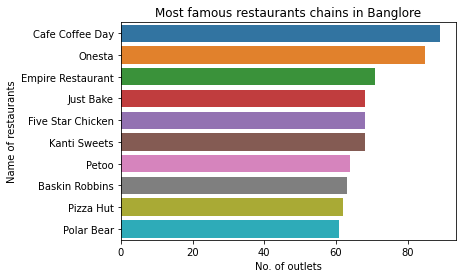

In [39]:
chains=df['name'].value_counts()[0:10]
sns.barplot(x=chains,y=chains.index)
plt.title('Most famous restaurants chains in Banglore')
plt.xlabel('No. of outlets')
plt.ylabel('Name of restaurants')

In [47]:
labels=['Accepted','Not Accepted']
orders= df['online_order'].value_counts()
px.pie(df,values=orders,labels=labels,title='Pie Chart to see number of online order accepting restaurants v/s restaurants not accepting online orders')

In [48]:
#Ratio between rastaurants providing table and not providing table 

In [56]:
tables= df['book_table'].value_counts()
labels = ['Not Booked','Booked']

In [50]:
import plotly.graph_objs as go 
from plotly.offline import iplot

In [57]:
trace = go.Pie(labels=labels,values=tables,hoverinfo='label+percent',textinfo='value')
iplot([trace])

In [109]:
df['rest_type'].isna().sum()

149

In [110]:
df.dropna(axis='index', subset=['rest_type'],inplace=True)

In [111]:
df['rest_type'].isna().sum()

0

In [112]:
trace1=go.Bar(
    x=df['rest_type'].value_counts().nlargest(10).index, 
    y=df['rest_type'].value_counts().nlargest(10)
)
iplot([trace1]) #Types of restuarnts for people to prefer

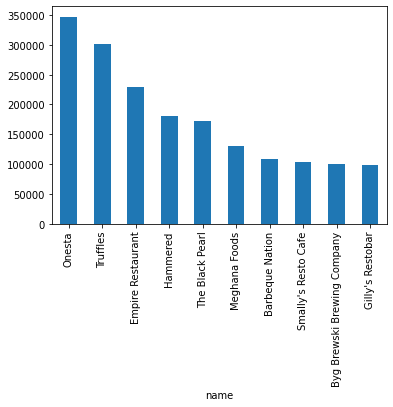

In [83]:
df.groupby('name')['votes'].sum().nlargest(10).plot.bar()

In [86]:
trace2= go.Bar(x=df.groupby('name')['votes'].sum().nlargest(10).index,
       y=df.groupby('name')['votes'].sum().nlargest(10))
iplot([trace2]) #Using pyplot

In [88]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
  location.append(key)
  restaurant.append(len(location_df['name'].unique()))

In [92]:
df_total = pd.DataFrame(zip(location,restaurant))
df_total.columns=['Location','Restaurant']
df_total.head()

,Location,Restaurant
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [94]:
df_total.set_index('Location',inplace=True)
df_total.head()

,Restaurant
Location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


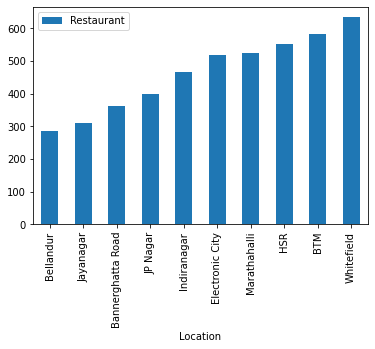

In [97]:
df_total.sort_values(by='Restaurant').tail(10).plot.bar()

In [98]:
#Variety of restaurants and prices in Bangalore

In [100]:
cuisine=df['cuisines'].value_counts()[0:10]
cuisine

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [103]:
trace3=go.Bar(x=df['cuisines'].value_counts()[0:10].index,y=df['cuisines'].value_counts()[0:10])
iplot([trace3]) #cuisine count in chart

In [104]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [106]:
df['approx_cost(for two people)'].isna().sum()

252

In [107]:
df.dropna(axis='index', subset=['approx_cost(for two people)'],inplace=True)

In [108]:
df['approx_cost(for two people)'].isna().sum()

0

In [115]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [116]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [118]:
df['approx_cost(for two people)']= df['approx_cost(for two people)'].apply(lambda x:x.replace(',', ''))
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43541, dtype: object

In [119]:
df['approx_cost(for two people)']= df['approx_cost(for two people)'].astype(int)

In [120]:
df['approx_cost(for two people)'].dtype

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



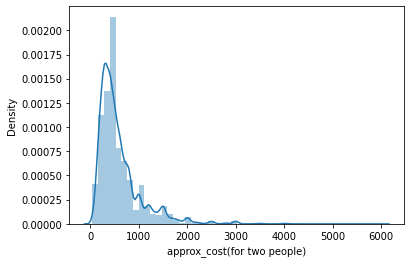

In [122]:
sns.distplot(df['approx_cost(for two people)'])

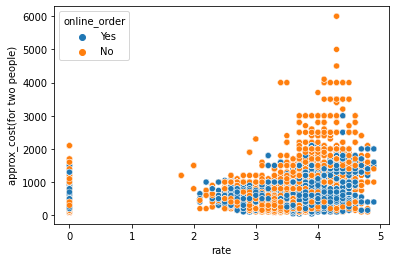

In [124]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=df) #creating correlation between rate and cost of food for 2 people

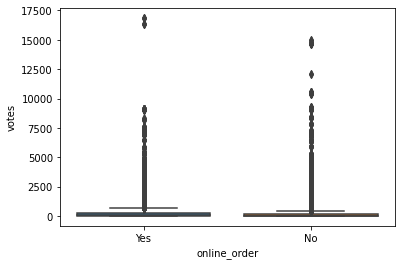

In [125]:
sns.boxplot(x='online_order',y='votes', data=df)

In [127]:
px.box(df, x='online_order',y='votes') #difference of restaurants accepting and not accepting orders

In [129]:
px.box(df, x='online_order',y='approx_cost(for two people)') #Restaurants accepting online orders are affordable 

In [130]:
#Most luxurious restuarant in Bangalore 

In [132]:
df['approx_cost(for two people)'].min()

40

In [133]:
df['approx_cost(for two people)'].max()

6000

In [139]:
df[df['approx_cost(for two people)'] == 6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [145]:
data = df.copy()

In [146]:
data.set_index('name',inplace=True)

In [147]:
data.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


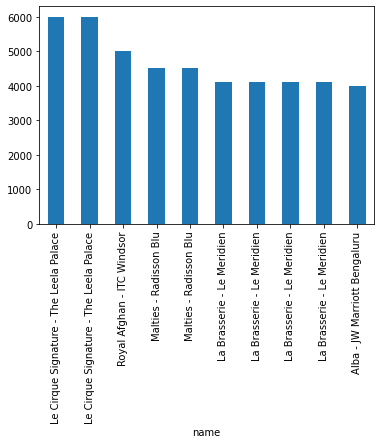

In [149]:
data['approx_cost(for two people)'].nlargest(10).plot.bar() #Top 10 expensive restaurants

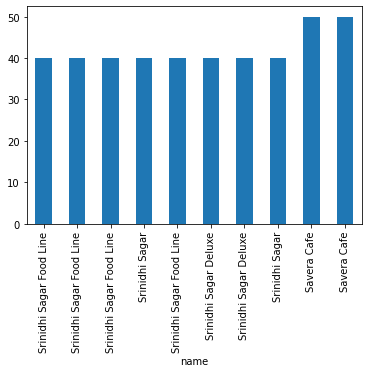

In [151]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar() #Cheapest restaurants in Bangalore

In [160]:
df_budget = data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget= df_budget.head().reset_index()
df_budget.head()

,name,approx_cost(for two people)
0,Addhuri Udupi Bhojana,300
1,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
2,The Coffee Shack,500
3,Caf-Eleven,450
4,T3H Cafe,300


In [162]:
#Performing Spatial Analysis, i.e., to perform analysis on some geographical features of a particular locality 

In [165]:
len(df[(df['rate'] > 4) & (df['approx_cost(for two people)']<=500)]['name'].unique()) #Affordable restaurants with good ratings

372

In [166]:
df_new = df[(df['rate'] > 4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari


In [168]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
  location.append(loc)
  total.append(len(location_df['name'].unique()))

In [169]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

,0,1
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [170]:
location_df.columns=['location','restaurant']

In [171]:
location_df.head()

,location,restaurant
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [172]:
#Finding the best budget restaurants in Bangalore 

In [173]:
def return_budget(location,restaurant):
  budget= df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>4) & (df['rest_type']==restaurant)]
  return (budget['name'].unique())

In [174]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [175]:
#Foodie Areas in Bangalore 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



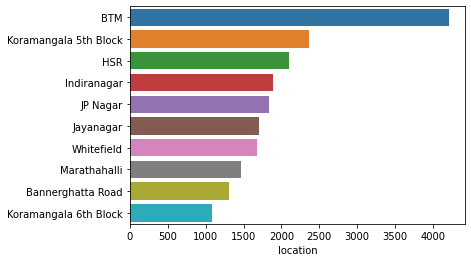

In [176]:
rest_loc= df['location'].value_counts()[0:10]
sns.barplot(rest_loc, rest_loc.index)

In [177]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [178]:
from geopy.geocoders import Nominatim

In [179]:
geolocator= Nominatim(user_agent='app')

In [181]:
lat_long=[]
for location in locations['Name']:
  location = geolocator.geocode(location)
  if location is None:
    lat_long.append(np.nan)
  else:
    geo=(location.latitude,location.longitude)
    lat_long.append(geo)

In [182]:
locations['geo_loc']=lat_long

In [183]:
locations.head()

,Name,geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [184]:
locations.shape

(92, 2)

In [185]:
rest_loc= pd.DataFrame(df['location'].value_counts().reset_index())
rest_loc.head()

,index,location
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [186]:
rest_loc.columns=['Name','Count']
rest_loc.head()

,Name,Count
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [187]:
rest_loc = rest_loc.merge(locations,on='Name',how='left').dropna()
rest_loc.head()

,Name,Count,geo_loc
0,BTM,4210,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,"(12.9343774, 77.628415)"
2,HSR,2102,"(18.1475, 41.538889)"
3,Indiranagar,1889,"(12.9732913, 77.6404672)"
4,JP Nagar,1842,"(12.2655944, 76.6465404)"


In [188]:
np.array(rest_loc['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9059707, 77.6017374), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (38.9385061, -84.572308),
       (12.93577245, 77.66676103753434), (12.933232, 77.6254669),
       (32.2934563, -64.78236307254568), (12.9252241, 77.6367015),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (17.1452094, 79.6218777), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.575894, -74.1251342),
       (-28.5477541, 29.788093), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7133336, -74.0092085),
       (13.0170347, 77.5726006), (13.0093455, 77.6377094),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338

In [189]:
lat, long = zip(*np.array(rest_loc['geo_loc']))

In [190]:
type(lat)

tuple

In [191]:
rest_loc['lat']=lat
rest_loc['long']=long

In [192]:
rest_loc.head()

,Name,Count,geo_loc,lat,long
0,BTM,4210,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,"(12.9343774, 77.628415)",12.934377,77.628415
2,HSR,2102,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1889,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1842,"(12.2655944, 76.6465404)",12.265594,76.646540


In [193]:
rest_loc.drop('geo_loc',axis=1,inplace=True)

In [194]:
rest_loc.head()

,Name,Count,lat,long
0,BTM,4210,45.954851,-112.496595
1,Koramangala 5th Block,2358,12.934377,77.628415
2,HSR,2102,18.147500,41.538889
3,Indiranagar,1889,12.973291,77.640467
4,JP Nagar,1842,12.265594,76.646540


In [197]:
import folium

In [199]:
from folium.plugins import HeatMap

In [200]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):
  basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
  return basemap

In [202]:
basemap=generatebasemap()
basemap

In [207]:
HeatMap(rest_loc[['lat','long','Count']].values.tolist(),radius=15).add_to(basemap)

In [208]:
basemap

In [210]:
df2= df[df['cuisines'] == 'North Indian']
df2.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [213]:
north_india = df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [214]:
north_india.columns=['Name','Count']

In [215]:
north_india.head()

,Name,Count
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [216]:
north_india=north_india.merge(locations,on='Name',how='left').dropna()
north_india.head()

,Name,Count,geo_loc
0,BTM,262,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,"(15.8876779, 75.7046777)"
2,Banaswadi,5,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,"(12.9059707, 77.6017374)"
4,Basavanagudi,17,"(12.9417261, 77.5755021)"


In [217]:
north_india['lat'], north_india['long'] = zip(*north_india['geo_loc'].values)

In [218]:
north_india.head()

,Name,Count,geo_loc,lat,long
0,BTM,262,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,5,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,"(12.9059707, 77.6017374)",12.905971,77.601737
4,Basavanagudi,17,"(12.9417261, 77.5755021)",12.941726,77.575502


In [219]:
north_india.drop('geo_loc',axis=1,inplace=True)

In [220]:
north_india.head()

,Name,Count,lat,long
0,BTM,262,45.954851,-112.496595
1,Banashankari,35,15.887678,75.704678
2,Banaswadi,5,13.014162,77.651854
3,Bannerghatta Road,60,12.905971,77.601737
4,Basavanagudi,17,12.941726,77.575502


In [221]:
basemap=generatebasemap()
HeatMap(north_india[['lat','long','Count']].values.tolist(),radius=15).add_to(basemap)
basemap

In [225]:
df_1= df.groupby(['rest_type','name']).agg('count')
df_1

url  ...  listed_in(city)
rest_type          name                              ...                 
Bakery             7th Heaven                     2  ...                2
                   A Little For Love              1  ...                1
                   Adarsh Bakery                  2  ...                2
                   Adi's Cake N Cafe              2  ...                2
                   Albert Bakery                  1  ...                1
...                                             ...  ...              ...
Takeaway, Delivery Yumlane                        2  ...                2
                   Yumme Veg                      2  ...                2
                   Zamorin's Mappillah Biryani    1  ...                1
                   Zu's Doner Kebaps              1  ...                1
                   eat.fit                        2  ...                2

[7712 rows x 15 columns]

In [226]:
df_1.sort_values(['url'],ascending=False)

url  ...  listed_in(city)
rest_type           name                      ...                 
Cafe                Cafe Coffee Day       89  ...               89
Casual Dining, Cafe Onesta                85  ...               85
Quick Bites         Five Star Chicken     67  ...               67
                    Domino's Pizza        60  ...               60
                    McDonald's            59  ...               59
...                                      ...  ...              ...
                    New Students Corner    1  ...                1
Dessert Parlor      Mr Gola                1  ...                1
Casual Dining       Parijatha Paradise     1  ...                1
                    Parijatha Fish Land    1  ...                1
Delivery            SaJuSo                 1  ...                1

[7712 rows x 15 columns]

In [231]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x: x.sort_values(by='url',ascending=False))

url  ...  listed_in(city)
   rest_type          name                             ...                 
0  Bakery             Just Bake                    44  ...               44
                      Warm Oven                    28  ...               28
                      INDULGE by InnerChef         28  ...               28
                      Karachi Bakery               26  ...               26
                      CakeZone                     21  ...               21
...                                               ...  ...              ...
86 Takeaway, Delivery Agraharam Meal                1  ...                1
                      Adyar Ananda Bhavan Sweets    1  ...                1
                      Faasos                        1  ...                1
                      @North Parontha Hut           1  ...                1
                      Lucky Singh & Co              1  ...                1

[7712 rows x 15 columns]

In [235]:
dataset = df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x: x.sort_values(by='url',ascending=False))['url'].reset_index().rename(columns={'url':'Count'})

In [236]:
dataset

,level_0,rest_type,name,Count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [238]:
casual_dining=dataset[dataset['rest_type']=='Casual Dining']
casual_dining

,level_0,rest_type,name,Count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1
